In [2]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading Data
day_df = pd.read_csv("day.csv")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
day_df.shape

(730, 16)

In [5]:
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
376,377,12-01-2019,1,1,1,0,4,1,2,15.682500,19.09690,80.2917,12.124789,269,3828,4097
89,90,31-03-2018,2,0,3,0,4,1,3,11.001653,12.87875,91.8333,14.582282,179,1506,1685
585,586,09-08-2019,3,1,8,0,4,1,1,30.989153,34.97540,62.0417,10.458700,1196,6090,7286
30,31,31-01-2018,1,0,1,0,1,1,2,7.414153,9.31250,60.3750,12.541864,42,1459,1501
465,466,11-04-2019,2,1,4,0,3,1,1,14.296536,16.86370,46.9565,19.783358,482,4380,4862
464,465,10-04-2019,2,1,4,0,2,1,1,18.313347,21.81165,43.5000,16.708125,819,5099,5918
480,481,26-04-2019,2,1,4,0,4,1,2,20.431653,24.17915,75.6667,11.833875,475,4551,5026
71,72,13-03-2018,1,0,3,0,0,0,1,15.758268,19.00455,52.7391,18.130468,982,1435,2417
446,447,23-03-2019,2,1,3,0,5,1,2,24.668347,28.50335,69.4167,7.792100,2469,5893,8362
439,440,16-03-2019,1,1,3,0,5,1,2,17.869153,21.81145,84.2083,7.583864,548,3830,4378


In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# There is only one object type column
# There is no null records in the any off column

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
# Filter the dteday field
set(day_df["dteday"].apply(lambda x: x.split("-")[-1]))
# In dteday data is available for 2018 and 2019
# Here we have month and year data 0:2018 and 1:2019 we need only day from the dteday then we can drop this column

{'2018', '2019'}

In [13]:
# creating col day of date
day_df['days'] = day_df["dteday"].apply(lambda x: x.split("-")[0])
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,01
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,02
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,03
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,04
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114,27
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095,28
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341,29
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796,30


In [14]:
# deleting or dropping column dteday
day_df.drop('dteday', axis=1, inplace=True)
day_df

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,01
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,02
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,03
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,04
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114,27
726,727,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095,28
727,728,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341,29
728,729,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796,30


In [16]:
# checking deleted columns
day_df.head(15)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,01
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,02
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,03
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,04
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,05
5,6,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606,06
6,7,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510,07
7,8,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959,08
8,9,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822,09
9,10,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321,10


In [18]:
#Dropping Instant column it just provide index values
day_df.drop('instant', axis=1, inplace=True)

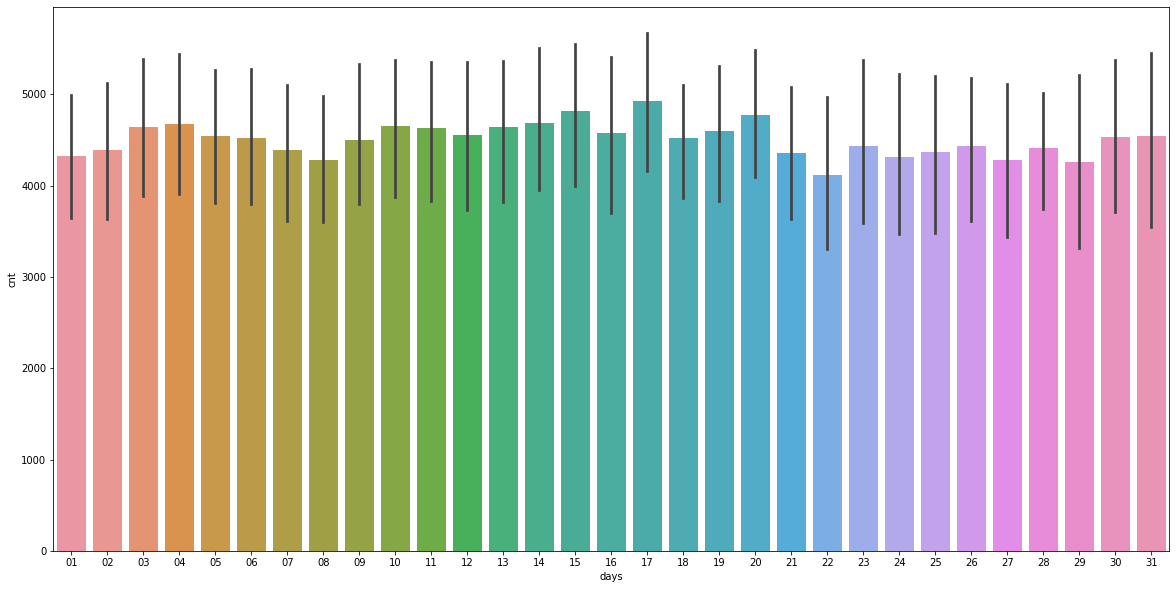

In [21]:
# ploting days Vs cnt
plt.figure(figsize=(20, 10))
sns.barplot(x='days', y='cnt', data=day_df)
plt.show() 

In [23]:
# There is not difference in days column from the graph so dropping it
day_df.drop('days', axis=1, inplace=True)
day_df

In [24]:
day_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [25]:
# Changing the categorical column as category type
# In day_df.info() our program does not recognized some categorical columns as category the values are number we can convert them into category type

In [26]:
category_col = ['season', 'mnth', 'weekday', 'weathersit']
day_df[category_col] = day_df[category_col].astype('category')
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  casual      730 non-null    int64   
 12  registered  730 non-null    int64   
 13  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(6)
memory usage: 61.1 KB


In [27]:
# Modifing the categorical columns

In [28]:
day_df.weekday.replace(
    {i: v for i, v in enumerate(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])},
    inplace=True
)
day_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace=True)
day_df.mnth.replace(
    {ind:v for ind,v in enumerate([datetime.date(1900, i , 1).strftime('%B') for i in range(1, 13)], start=1)},
    inplace=True
)
day_df.weathersit.replace({1: "clear", 2: 'Cloudy', 3: 'Light Rain', 4: 'Heavy Rain'}, inplace=True)
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,January,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,January,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,January,0,Monday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,January,0,Tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,January,0,Wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


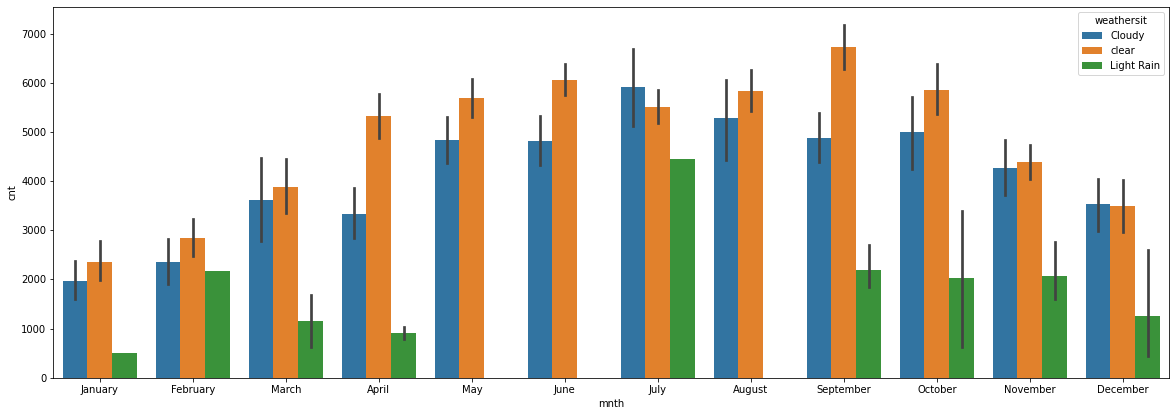

In [31]:
# ploting mnth Vs cnt Vs weathersit
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.barplot(x='mnth', y='cnt', data=day_df, hue='weathersit')

In [32]:
# Septembr seems to showing slitly huge count

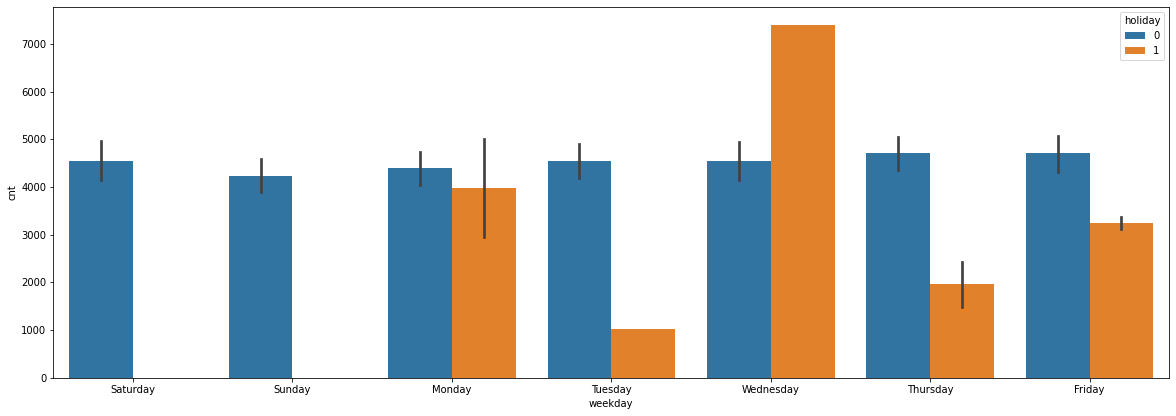

In [34]:
# ploting weekday Vs cnt Vs holiday
plt.figure(figsize=(20,15))
plt.subplot(2,1,2)
sns.barplot(x='weekday', y='cnt', data=day_df, hue='holiday')
plt.show()

In [35]:
# On  Wednesday requirment for bike is highest when there is holiday

In [36]:
# Effect of season on bike requirments

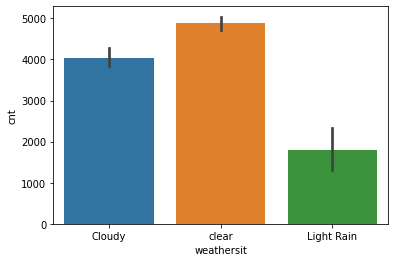

In [37]:
sns.barplot(x='weathersit', y='cnt', data=day_df)
plt.show()

In [38]:
# Requirement is more in clear weather

In [39]:
# Visualizing the categorical variable

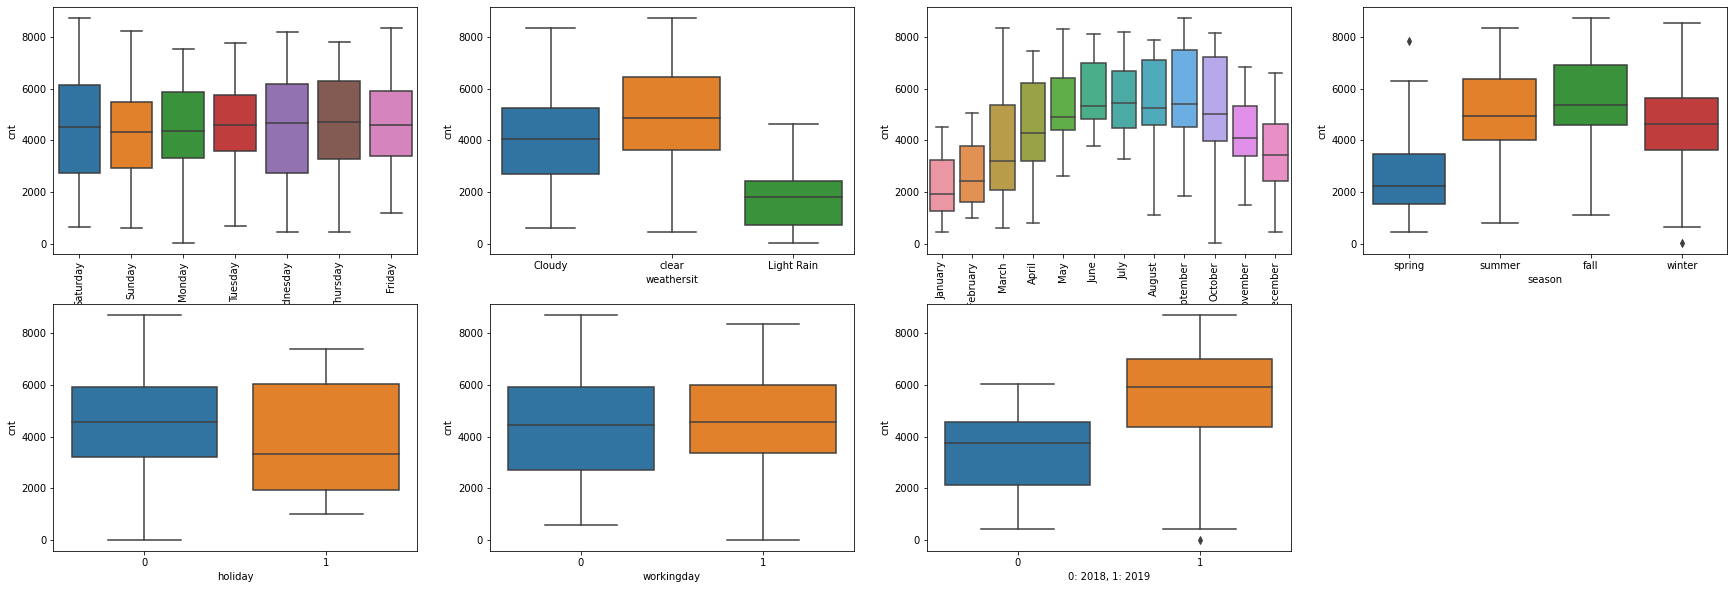

In [41]:
plt.figure(figsize=(30,10))
plt.subplot(2,4,1)
sns.boxplot(x="weekday", y="cnt", data=day_df)
plt.xticks(rotation=90)

plt.subplot(2,4,2)
sns.boxplot(x="weathersit", y="cnt", data=day_df)

plt.subplot(2,4,3)
sns.boxplot(x="mnth", y="cnt", data=day_df)
plt.xticks(rotation=90)

plt.subplot(2,4,4)
sns.boxplot(x="season", y="cnt", data=day_df)

plt.subplot(2,4,5)
sns.boxplot(x="holiday", y="cnt", data=day_df)

plt.subplot(2,4,6)
sns.boxplot(x="workingday", y="cnt", data=day_df)

plt.subplot(2,4,7)
sns.boxplot(x="yr", y="cnt", data=day_df)
plt.xlabel("0: 2018, 1: 2019")

plt.show()

In [43]:
# dropping casual and registered
day_df.drop(['casual', 'registered'], axis=1, inplace=True)
day_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

<Figure size 2160x1080 with 0 Axes>

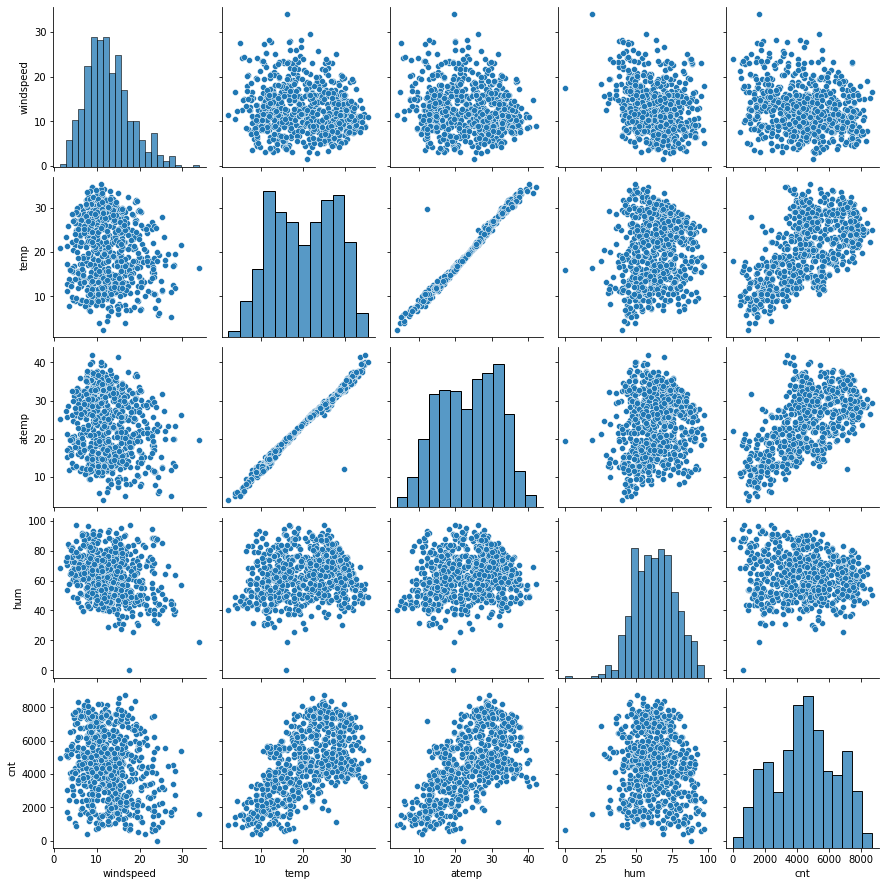

In [44]:
# Analyzing the numerical varibales columns
num_col = ['windspeed', 'temp', 'atemp', 'hum', 'cnt']
plt.figure(figsize=(30,15))
sns.pairplot(day_df[num_col])
plt.show()

In [45]:
# There is a Liner Relation between Temp Atemp and CNT from above plots

In [48]:
# Modeling data preparation
# Converting Binary variables 
# Other category variables to dummy variables
# Split into train and test
# rescaling the variables

In [49]:
status = pd.get_dummies(day_df[category_col], drop_first=True)
status.head()

,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain,weathersit_clear
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [51]:
# concadinating the existing days_df
day_df = pd.concat([day_df, status], axis=1)
day_df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain,weathersit_clear
0,spring,0,January,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,0
1,spring,0,January,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,0
2,spring,0,January,0,Monday,1,clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,1
3,spring,0,January,0,Tuesday,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,1
4,spring,0,January,0,Wednesday,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,December,0,Thursday,1,Cloudy,10.420847,11.33210,65.2917,...,0,0,0,0,0,1,0,0,0,0
726,spring,1,December,0,Friday,1,Cloudy,10.386653,12.75230,59.0000,...,0,0,0,0,0,0,0,0,0,0
727,spring,1,December,0,Saturday,0,Cloudy,10.386653,12.12000,75.2917,...,0,0,0,1,0,0,0,0,0,0
728,spring,1,December,0,Sunday,0,clear,10.489153,11.58500,48.3333,...,0,0,0,0,1,0,0,0,0,1


In [52]:
#dropping original columns
day_df.drop(category_col, axis=1, inplace=True)
day_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain,weathersit_clear
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,1


In [53]:
# Creating test and train dataset
df_train, df_test = train_test_split(day_df, train_size=0.7, test_size=0.3, random_state=100)
df_train.shape

(510, 30)

In [54]:
df_test.shape

(219, 30)

In [56]:
# Scaling numerical columns
scaler = MinMaxScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain,weathersit_clear
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,0


In [57]:
df_train[num_col].describe()

,windspeed,temp,atemp,hum,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.320768,0.537262,0.512989,0.650369,0.513620
std,0.169797,0.225844,0.212385,0.145882,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.199179,0.339853,0.332086,0.538643,0.356420
50%,0.296763,0.540519,0.526811,0.653714,0.518638
75%,0.414447,0.735215,0.688457,0.754830,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
# Heat Map

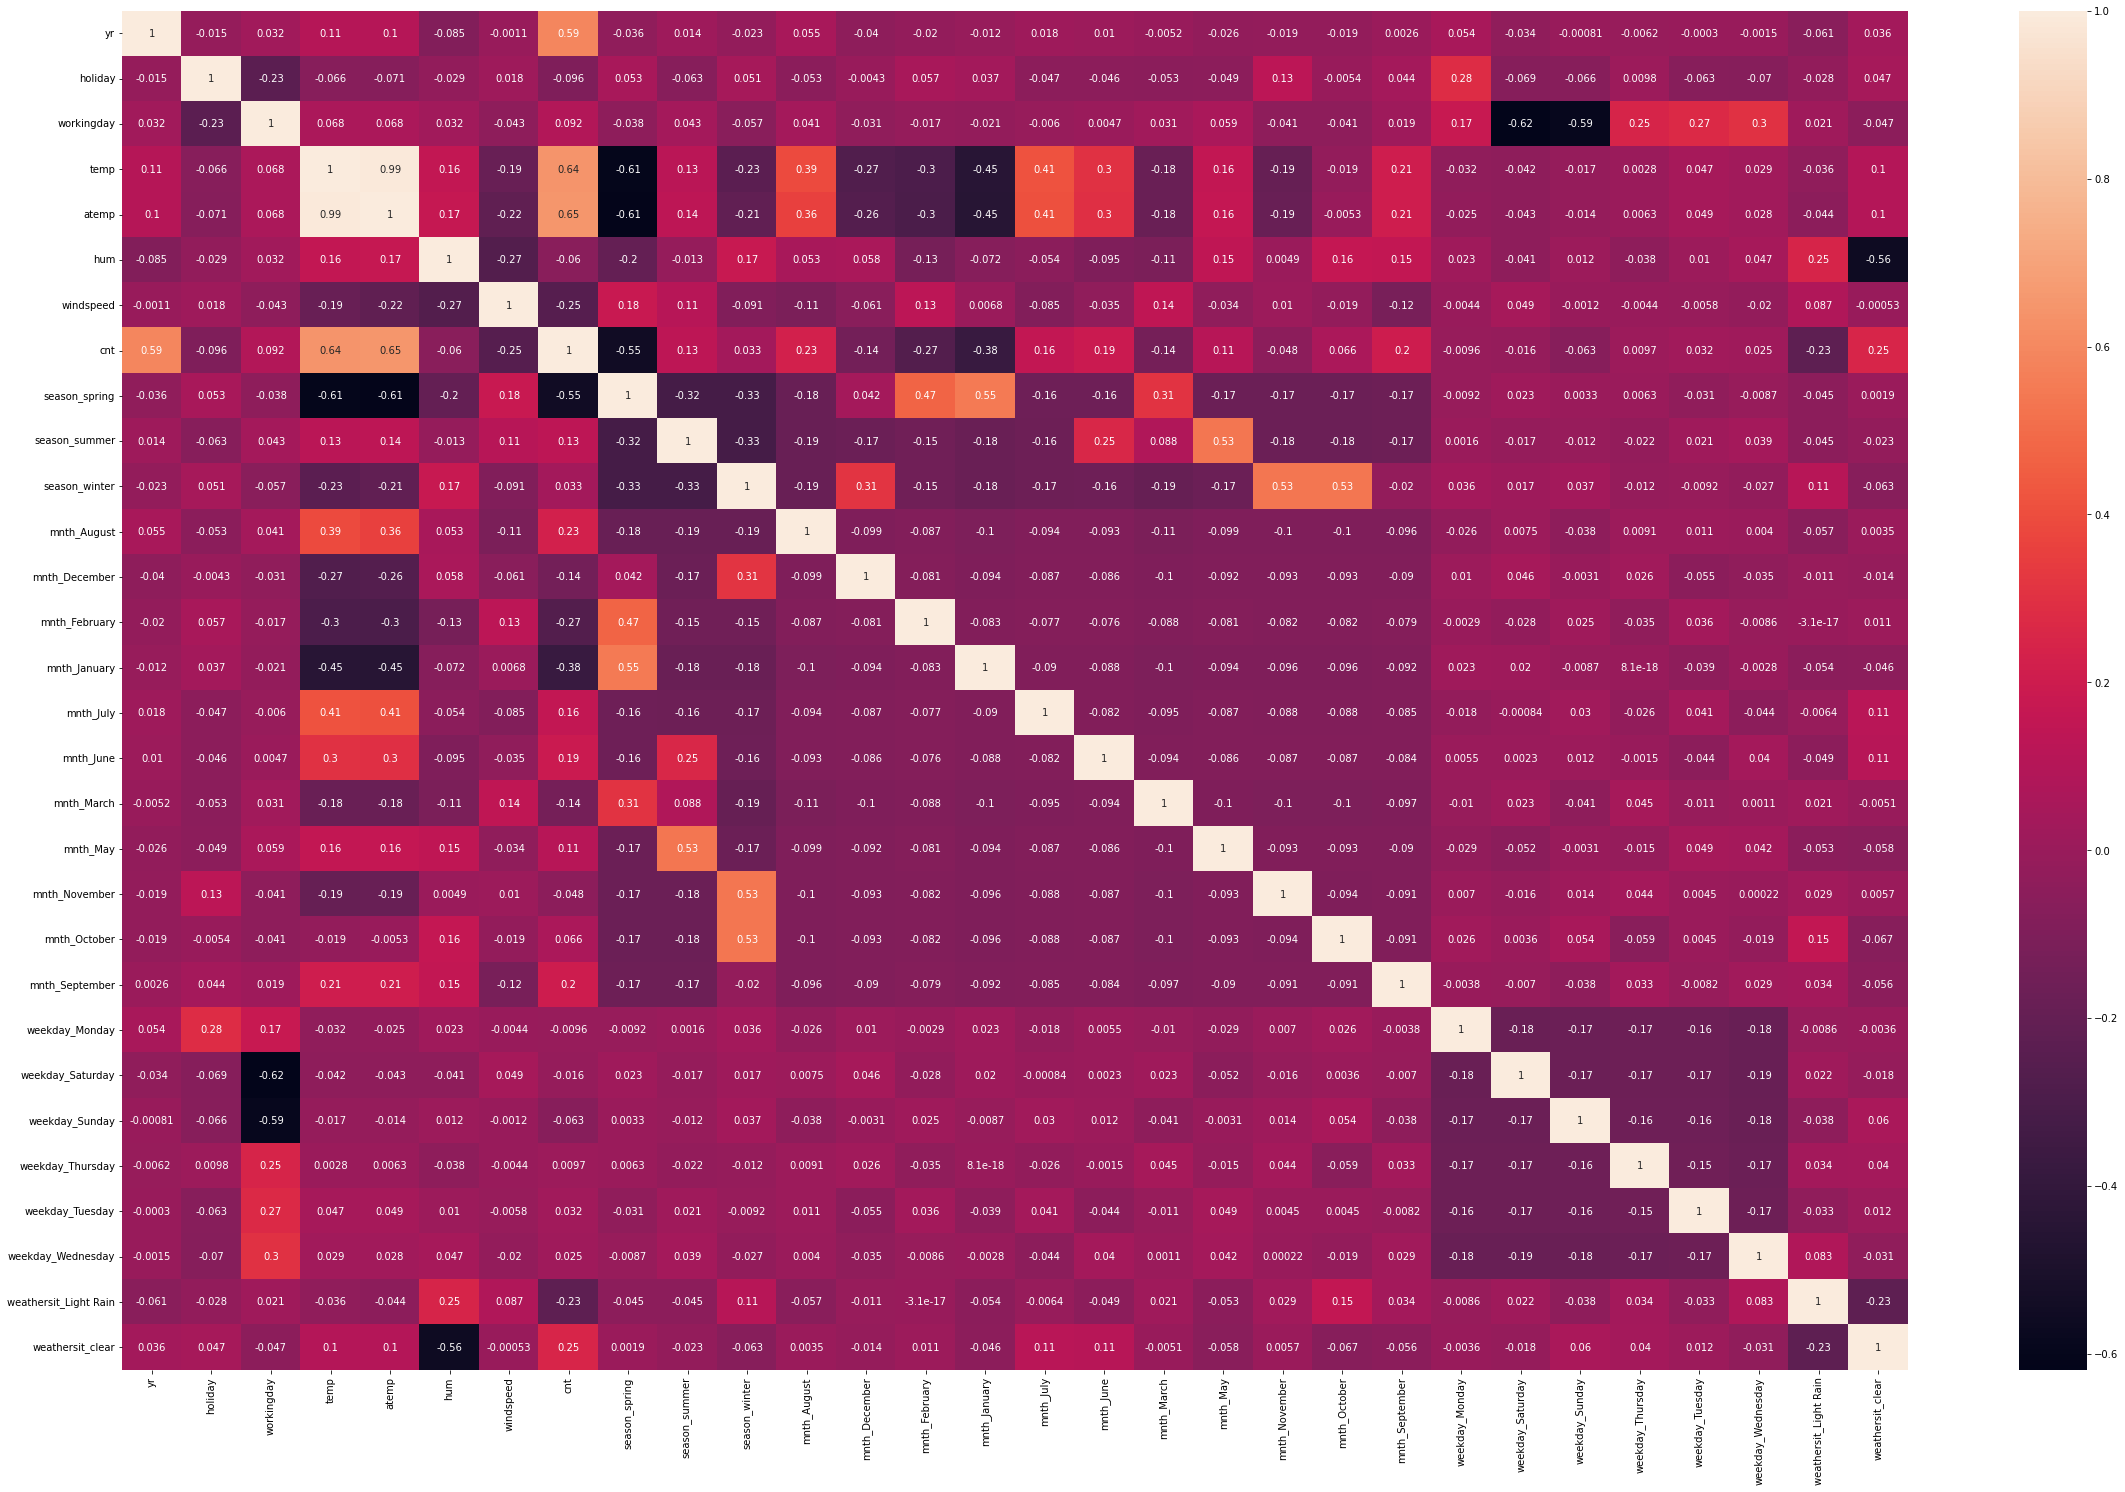

In [60]:
plt.figure(figsize=(40,25))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

In [62]:
# Inference from heat map
# Temp and Atemp highly co-relation with each other
# it is aslo have high co-relation with cnt variables
# working day have high negitive corelation with saturday and sunday 

In [64]:
# Building Model using RFE

In [65]:
# Creating predection and target variable
y_train = df_train.pop('cnt')

In [66]:
X_train = df_train
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Light Rain', 'weathersit_clear'],
      dtype='object')

In [71]:
# using sklearn for RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [72]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [74]:
rfe = RFE(lm, n_features_to_select=13)
rfe = rfe.fit(X_train, y_train)

In [76]:
# checking the column weightage and RFE suppourt
print(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), '\n')
columns = X_train.columns[rfe.support_]
print(columns, '\n')
print(f"columns which are not supported by RFE:{X_train.columns[~rfe.support_]}")

[('yr', True, 1), ('holiday', True, 1), ('workingday', True, 1), ('temp', True, 1), ('atemp', False, 8), ('hum', True, 1), ('windspeed', True, 1), ('season_spring', True, 1), ('season_summer', False, 3), ('season_winter', False, 2), ('mnth_August', False, 10), ('mnth_December', False, 6), ('mnth_February', False, 7), ('mnth_January', False, 4), ('mnth_July', True, 1), ('mnth_June', False, 16), ('mnth_March', False, 17), ('mnth_May', False, 9), ('mnth_November', False, 5), ('mnth_October', False, 14), ('mnth_September', True, 1), ('weekday_Monday', False, 11), ('weekday_Saturday', True, 1), ('weekday_Sunday', True, 1), ('weekday_Thursday', False, 13), ('weekday_Tuesday', False, 12), ('weekday_Wednesday', False, 15), ('weathersit_Light Rain', True, 1), ('weathersit_clear', True, 1)] 

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'mnth_July', 'mnth_September', 'weekday_Saturday',
       'weekday_Sunday', 'weathersit_Light Rain', 'weathersit_cle

In [77]:
# building modele using statsmodel api
def state_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm, X_train_sm

In [78]:
# this function will take cols as params and generate VIF
def show_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [80]:
# Model 1 using RFE Recommandations

In [81]:
model = state_model(columns)
show_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     211.9
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.27e-186
Time:                        06:56:34   Log-Likelihood:                 500.28
No. Observations:                 510   AIC:                            -974.6
Df Residuals:                     497   BIC:                            -919.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

In [82]:
# droping the varibale weekday_Saturday at it has high p-Value
columns = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_July', 'mnth_September',
       'weathersit_Light Rain', 'weathersit_clear']
model = state_model(columns)
show_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.69e-190
Time:                        06:56:48   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

In [83]:
# hum has very high VIF and negative corelation with cnt
columns = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_July', 'mnth_September',
       'weekday_Saturday', 'weathersit_Light Rain', 'weathersit_clear']
lm = state_model(columns)
show_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.4
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          7.97e-187
Time:                        06:57:14   Log-Likelihood:                 500.76
No. Observations:                 510   AIC:                            -975.5
Df Residuals:                     497   BIC:                            -920.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.11

In [84]:
# droping the weakday saturday as it has very hight p-value i.e > 0.05
columns = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_July', 'mnth_September', 'weathersit_Light Rain', 'weathersit_clear']
model, X_train_sm = state_model(columns)
show_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.40e-187
Time:                        06:57:31   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.11

In [86]:
# Observation
# p-value of the features and v if both low we can conclude that is our final model
# Residual Analysis

In [87]:
y_train_pre = model.predict(X_train_sm)

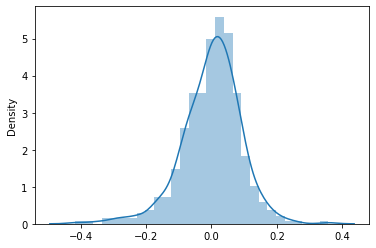

In [88]:
res = y_train - y_train_pre
sns.distplot(res)

In [89]:
#From the above graph it is evident that Error Distribution Is Normallly Distributed Across 0, which indicates that our model has handled the assumption of Error Normal Distribution properly

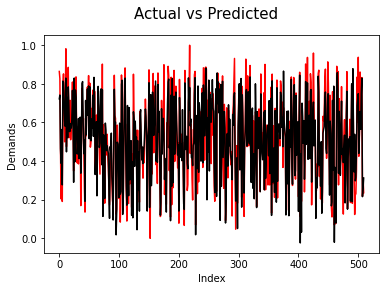

In [93]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="red")
plt.plot(c,y_train_pre, color="black")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

In [94]:
#Actual and predected value of target variable seems to be pretty match, so we can conclude model is ok

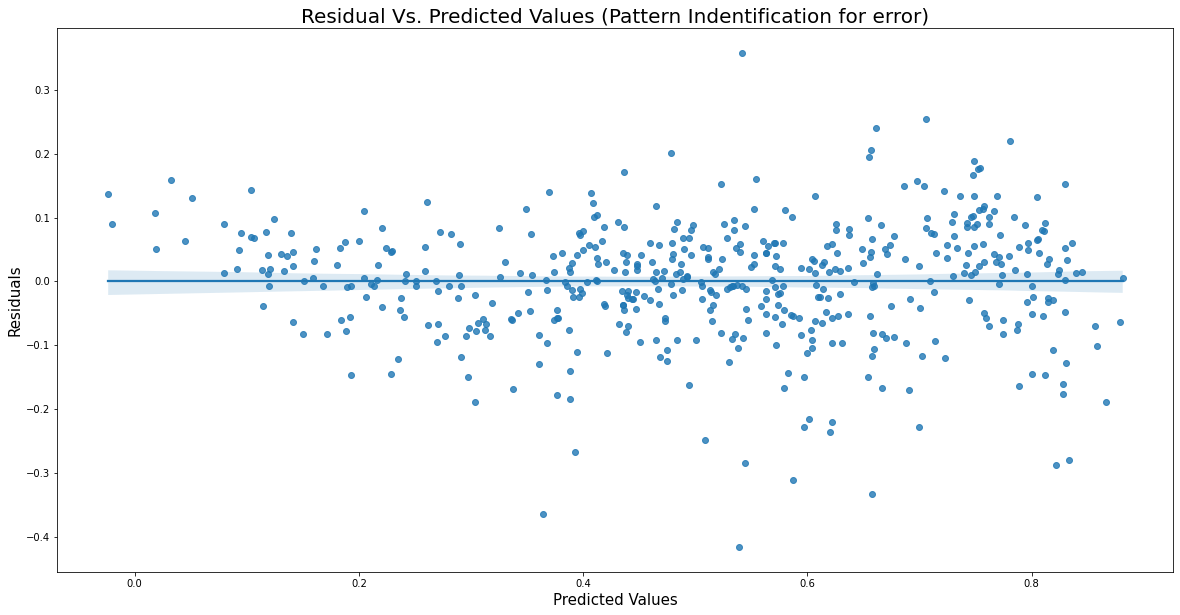

In [96]:
# validating homoscedasticity
fig, ax = plt.subplots(figsize=(20, 10))
sns.regplot(x=y_train_pre, y=res,ax=ax)
plt.title('Residual Vs. Predicted Values (Pattern Indentification for error)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [97]:
# making prediction on test set
# scaling the numeric values
df_test[num_col] = scaler.transform(df_test[num_col])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain,weathersit_clear
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,1


In [98]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain,weathersit_clear
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.652968
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.477117
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
# spliting x_test and y_test
X_test = df_test[columns]

In [100]:
Y_test= df_test.pop('cnt')

In [103]:
# add constant
X_test_sm = sm.add_constant(X_test)

In [104]:
# predicting target variable using test feature variables
Y_test_pre = model.predict(X_test_sm)

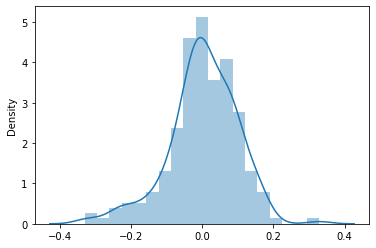

In [105]:
res = Y_test - Y_test_pre
sns.distplot(res)

Text(0, 0.5, 'Y_test_pre')

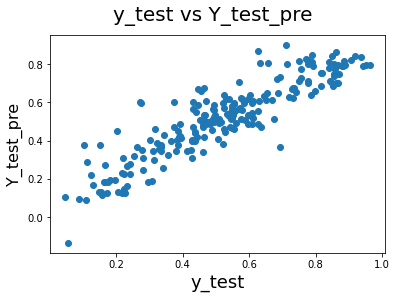

In [106]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(Y_test,Y_test_pre)
fig.suptitle('y_test vs Y_test_pre', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('Y_test_pre', fontsize=16)

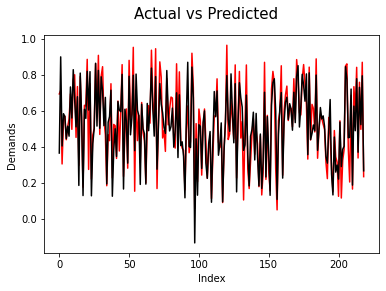

In [108]:
# Actual vs Predicted
c = [i for i in range(0,len(X_test),1)]
plt.plot(c,Y_test, color="red")
plt.plot(c,Y_test_pre, color="black")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

In [109]:
# from above actual and predected value for test data is also seems to aligned properly and they seems to be match

In [111]:
# Evaluating r2_score

In [114]:
columns
r2_score(y_true=Y_test, y_pred=Y_test_pre)

0.804941844098238

In [115]:
# r2_score 0.80 that is 80% coverage is quite good and our models seems to explain 80% of the data

# Formula
# Equation for best fit line is 
###
CNT(Target variable) = 0.1181 + (yr * 0.2335) + (holiday * -0.0980) + (temp * 0.4915) + (windspeed * -0.1480) + (season_spring * -0.0669) + (season_summer * 0.0453) + (season_winter * 0.0831) + (mnth_July * -0.0524) + (mnth_September * 0.0767) + (weathersit_Light Rain * -0.2036) + (weathersit_clear * 0.0816)

## Model Interpretetion 

- <b> significant variable for model building and predicting the target value cnt are listed as below </b>
    'yr',
    'holiday',
    'temp',
    'windspeed',
    'season_spring',
    'season_summer',
    'season_winter',
    'mnth_July',
    'mnth_September',
    'weathersit_Light Rain',
    'weathersit_clear'
- <b> Variable to focus on :</b> temp, weathersit_clear, season_winter
    - unit increment in temp raise the cnt by 0.49 units
    - unit increment in weathersit_clear raise the cnt by 0.081 units
    - unit increment in season_winter raise the cnt by 0.0831 units
